In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")

In [5]:
import performance as perf
import utils 
import tears
import plotting

In [6]:
ftr_stack = utils.get_clean_factor_and_forward_returns(close_df.pct_change().rolling(20).std().shift(1), close_df, quantiles=10, periods=(5,10,20))

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,-0.075,-0.089,-0.107
IC Std.,0.170,0.172,0.175
IC_IR,-0.437,-0.518,-0.609
t-stat(IC),-15.476,-18.326,-21.556
p-value(IC),0.000,0.000,0.000
IC Skew,0.318,0.398,0.256
IC Kurtosis,0.484,0.529,0.374


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.239,0.356,0.505
Quantile 2 Mean Turnover,0.505,0.659,0.786
Quantile 3 Mean Turnover,0.602,0.742,0.841
Quantile 4 Mean Turnover,0.641,0.773,0.860
Quantile 5 Mean Turnover,0.651,0.783,0.870
Quantile 6 Mean Turnover,0.647,0.783,0.871
Quantile 7 Mean Turnover,0.626,0.772,0.868
Quantile 8 Mean Turnover,0.586,0.744,0.852
Quantile 9 Mean Turnover,0.499,0.675,0.817
Quantile 10 Mean Turnover,0.254,0.422,0.676


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.897,0.781,0.555


<Figure size 640x480 with 0 Axes>

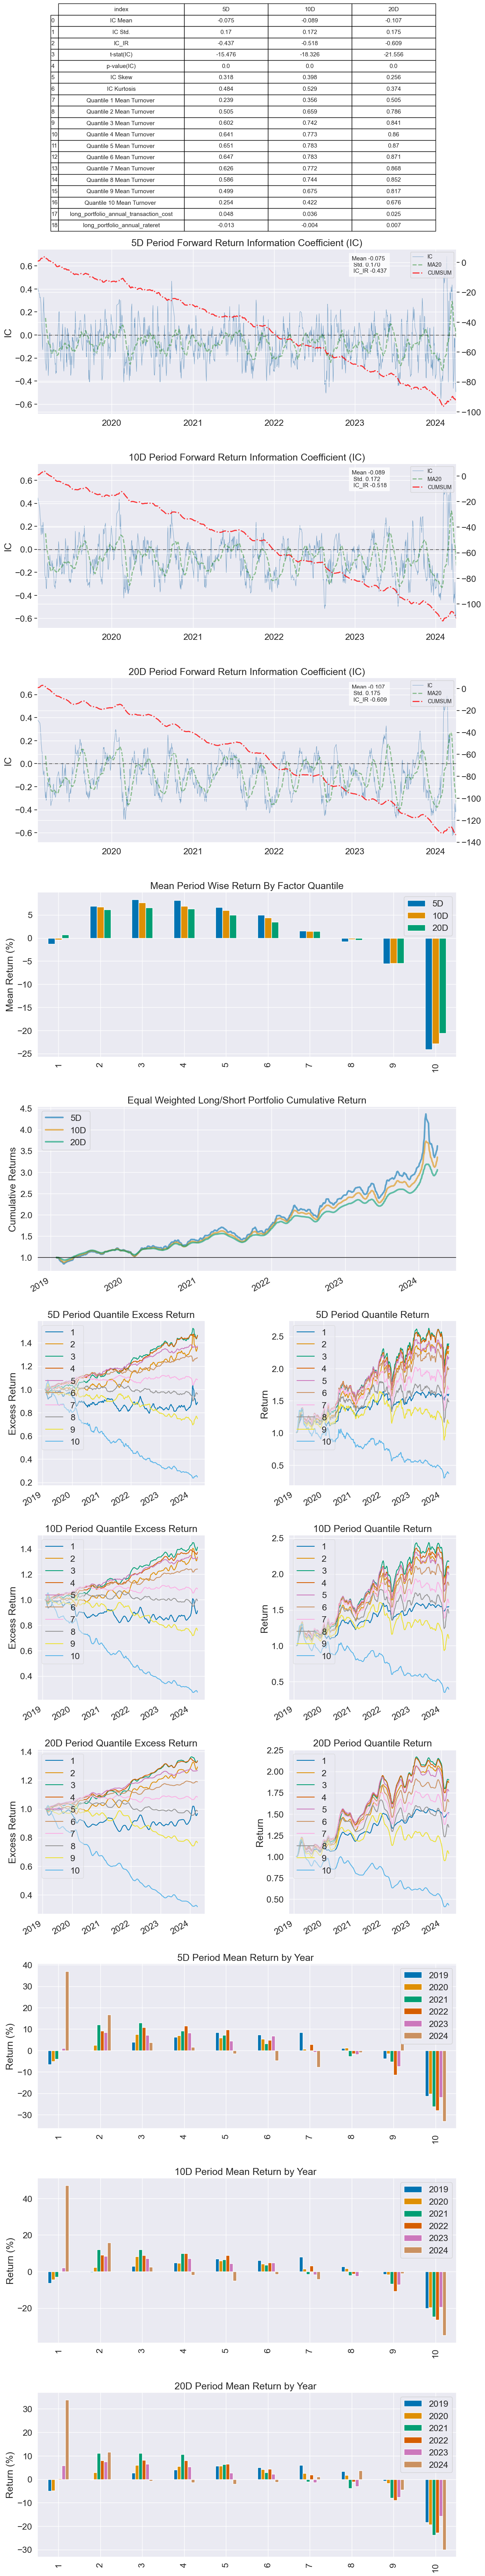

In [7]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./alpha_007/")